Sample Data:
   Gender  Age Smoking_status Alcohol_Consumption Pre-existing_conditions  \
0    Male   37     Non-smoker            Moderate                     Yes   
1  Female   45         Smoker                High                      No   
2    Male   63         Smoker                High                     Yes   
3    Male   53         Smoker                High                      No   
4    Male   29         Smoker                High                     Yes   

   Cholesterol_Level  Blood_Pressure  Heart_Rate  Has_disease  
0                234              83          80            1  
1                262              95          95            0  
2                211             103          82            0  
3                217             159          75            0  
4                185              81          98            0  

Evaluation Metrics:
accuracy: 0.45
precision: 0.46153846153846156
recall: 0.6
f1_score: 0.5217391304347826
training_time: 0.008933782577514

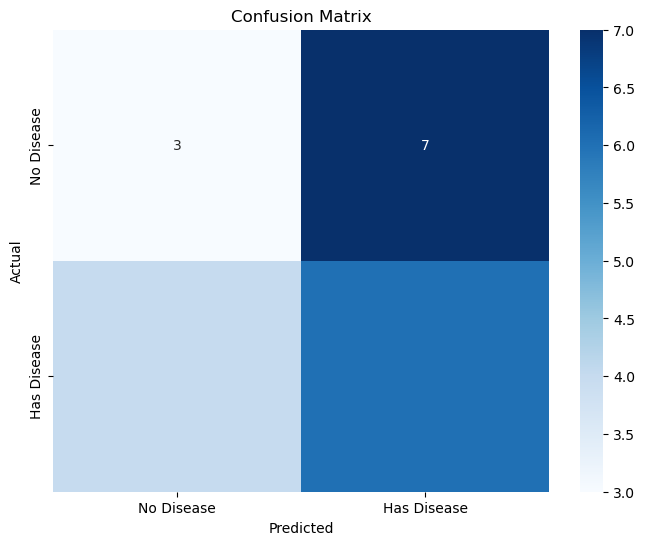

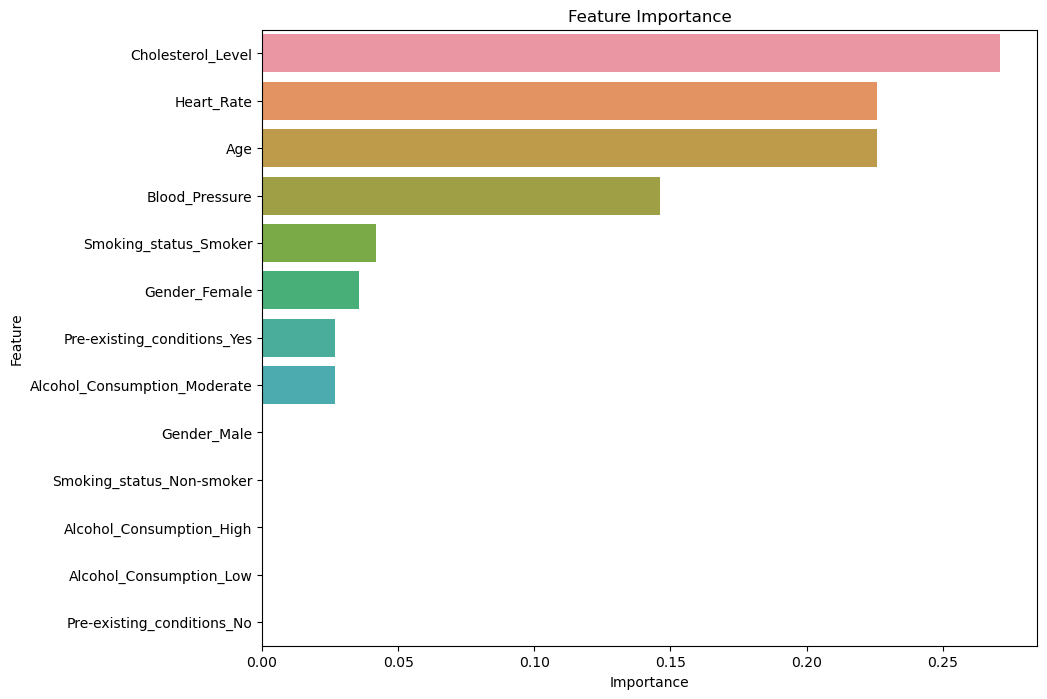

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create the dataset
def create_dataset(num_samples=100):
    np.random.seed(42)  # For reproducibility

    data = {
        'Gender': np.random.choice(['Male', 'Female'], size=num_samples),
        'Age': np.random.randint(20, 80, size=num_samples),
        'Smoking_status': np.random.choice(['Smoker', 'Non-smoker'], size=num_samples),
        'Alcohol_Consumption': np.random.choice(['Low', 'Moderate', 'High'], size=num_samples),
        'Pre-existing_conditions': np.random.choice(['Yes', 'No'], size=num_samples),
        'Cholesterol_Level': np.random.randint(120, 300, size=num_samples),
        'Blood_Pressure': np.random.randint(80, 180, size=num_samples),
        'Heart_Rate': np.random.randint(60, 100, size=num_samples),
        'Has_disease': np.random.randint(0, 2, size=num_samples)
    }

    df = pd.DataFrame(data)
    return df

# Generate the dataset
df = create_dataset(num_samples=100)

# Print the first few rows of the dataset
print("Sample Data:")
print(df.head())
print()

# Convert categorical variables into numerical ones
df = pd.get_dummies(df, columns=['Gender', 'Smoking_status', 'Alcohol_Consumption', 'Pre-existing_conditions'])

# Define features and target
X = df.drop(columns=['Has_disease'])
y = df['Has_disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Measure training time
start_time = time.time()
clf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_pred = clf.predict(X_test)
prediction_time = time.time() - start_time

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Output results
results = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'training_time': training_time,
    'prediction_time': prediction_time,
    'confusion_matrix': conf_matrix,
    'classification_report': class_report
}

# Print the results
print("Evaluation Metrics:")
for key, value in results.items():
    if key == 'confusion_matrix':
        print(f"{key}:")
        print(value)
    elif key == 'classification_report':
        print(f"{key}:")
        print(classification_report(y_test, y_pred))
    else:
        print(f"{key}: {value}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Has Disease'], yticklabels=['No Disease', 'Has Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot Feature Importance
feature_importance = clf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()
